In [ ]:
# Homework 3 ORDER BATCHING PROBLEM

from docplex.mp.model import Model
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

![Screenshot 2023-12-11 alle 14.48.53.png](<attachment:Screenshot 2023-12-11 alle 14.48.53.png>)
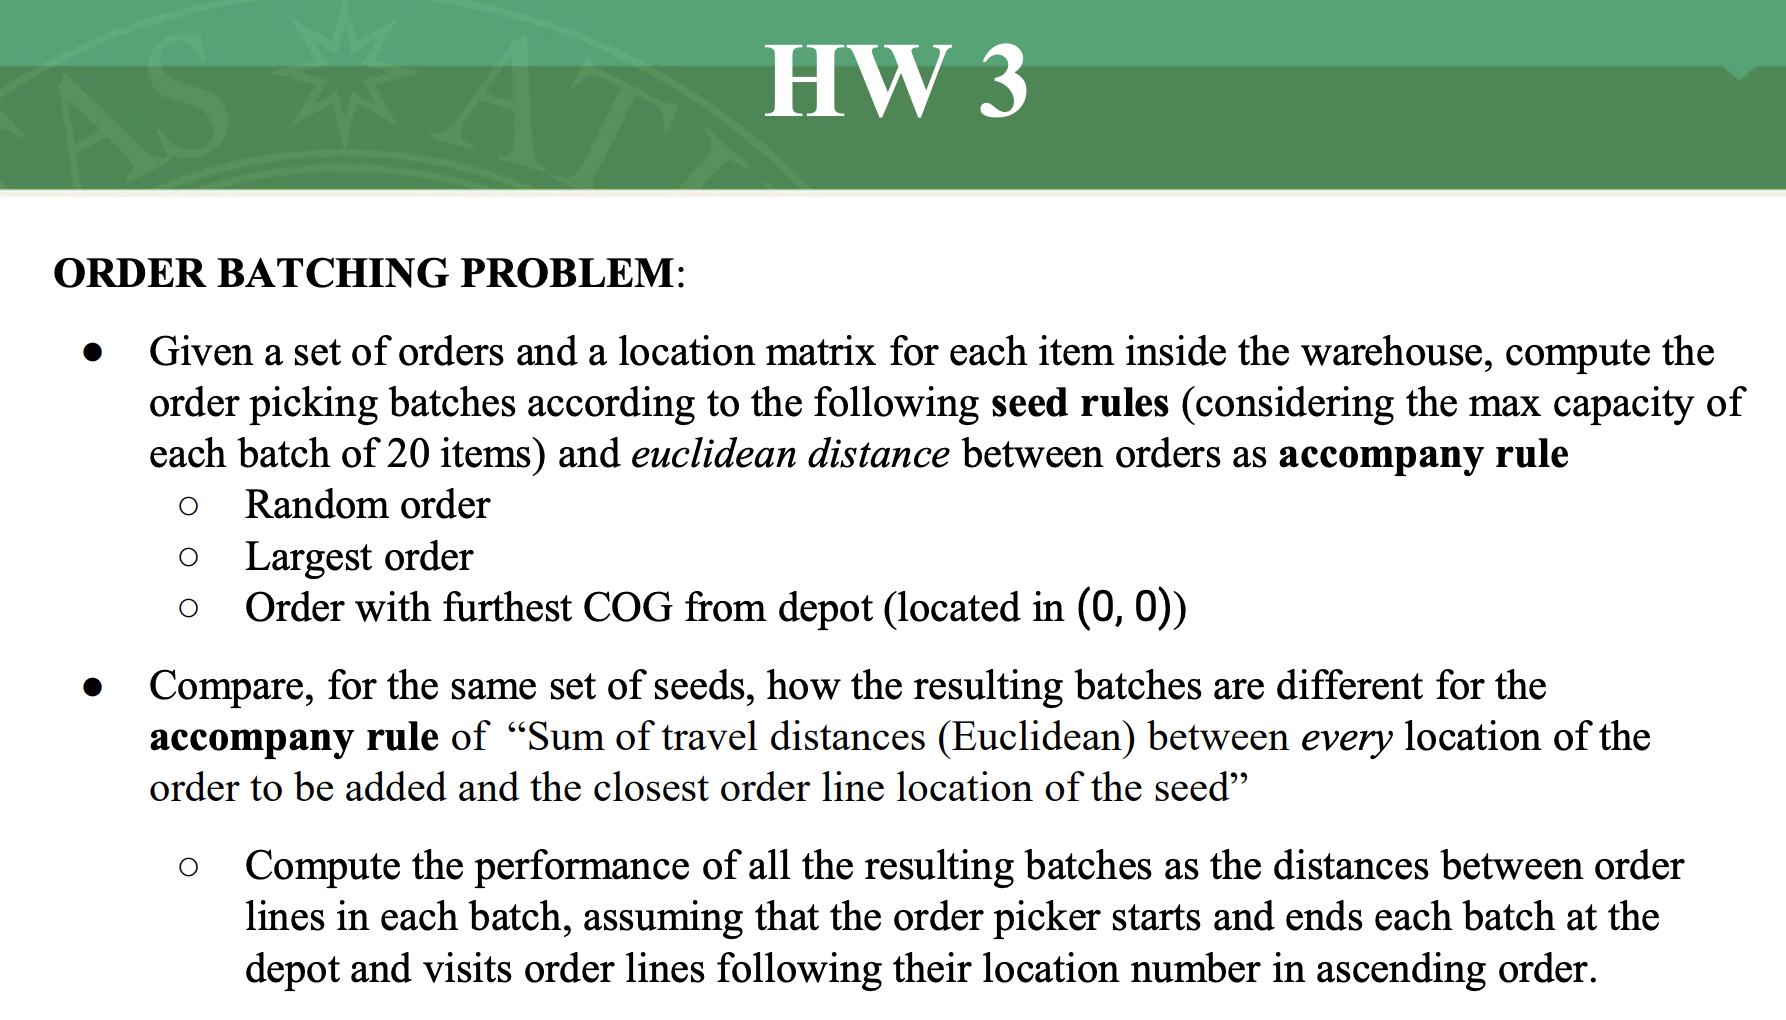

In [ ]:
#list of list(orders)

wh_coords = pd.read_csv("./wh_coords.csv")

lines = open('./orders.csv', 'r').readlines()
orders = [list(map(float, line.strip().split(','))) for line in lines]

X = wh_coords['x'].values 
Y = wh_coords['y'].values 

#max_cap = len(orders)
max_cap = 20

In [ ]:
def COG(order):
    x = 0
    y = 0
    for line in order:
        index = int(line) - 1  # Convert float to integer and adjust for zero-based indexing
        x += X[index]
        y += Y[index]
    return [x / len(order), y / len(order)]

def euclid_dist(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def calculate_distance_between_points(point1, point2):
    # Assuming points are in the format [x, y]
    return np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def calculate_batch_distance(batch, wh_coords):
    total_distance = 0.0
    depot = [0.0, 0.0]  # Depot coordinates
    for order in batch:
        current_location = depot  # Start from the depot
        for line in order:
            index = int(line) - 1  # Convert float to integer and adjust for zero-based indexing
            order_location = [wh_coords.iloc[index]['x'], wh_coords.iloc[index]['y']]
            total_distance += calculate_distance_between_points(current_location, order_location)
            current_location = order_location
    # Return to the depot after completing the batch
    total_distance += calculate_distance_between_points(current_location, depot)
    return total_distance

In [ ]:
simil_matr = np.zeros([len(orders),len(orders)])

for i in range(len(orders)):
    xi,yi = COG(orders[i])
    for j in range(len(orders)):
        if i != j:
            xj,yj = COG(orders[j])
            simil_matr[i,j] = euclid_dist(xi,xj,yi,yj)
        
print(simil_matr)

In [ ]:
# Accompany rule 1 - Euclidean distance  
# Seed rule 1 - Random order

# Create the batches
np.random.seed(0)

rndm = np.random.randint(0,len(orders))

batches = [[orders[rndm]]]
capacity = len(orders[rndm])

def most_similar(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in range(len(orders)):
        simil = simil_matr[i,j]
        if simil < min_sim and i!=j and j in indexces:
            min_sim = simil
            J_sim = j
    return J_sim

i = rndm 
to_add = list(range(len(orders)))
to_add.remove(i)

k = 0
while to_add !=[]:
    j = most_similar(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j


for n, batch in enumerate(batches):
    print(f'Batch{n+1}:{batch}')

tot_performance = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance += performance

print(f"Total Performance: {tot_performance}")

list_perf = {'Accompany Rule':'Euclidean distance','Seed rule':'Random order','Total Performance':tot_performance}
print(list_perf)

In [ ]:
# Accompany rule 1 - Euclidean distance  
# Seed Rule 2 - Largest order

def biggest_order():
    l = []
    dist = []
    for i in range(0,len(orders)):
        l.append(len(orders[i]))
        xi,yi = COG(orders[i])
        dist.append(euclid_dist(0,0,xi,yi))
    return l,dist

l,dist = biggest_order()

max_O = np.max(l)

min = np.inf
j = -1
for i in range(0,len(orders)):
    if l[i] == max_O:
        if(dist[i]<min):
            min = dist[i]
            j = i

# Create the batches
largest = j

batches = [[orders[largest]]]
capacity = len(orders[largest])


def most_similar(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in range(len(orders)):
        simil = simil_matr[i,j]
        if simil < min_sim and i!=j and j in indexces:
            min_sim = simil
            J_sim = j
    return J_sim

i = largest 
to_add = list(range(len(orders)))
to_add.remove(i)


k = 0
while to_add !=[]:
    j = most_similar(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j

for n, batch in enumerate(batches):
    print(f'Batch {n+1}: {batch}')

tot_performance = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance += performance

print(f"Total Performance: {tot_performance}")

list_perf = {'Accompany Rule':'Euclidean distance','Seed rule':'Largest order','Total Performance':tot_performance}
print(list_perf)

In [ ]:
# Accompany rule 1 - Euclidean distance  
# Seed Rule 3 - Order with furthest COG from depot (0,0)

def furthest_COG():
    l = []
    dist = []
    for i in range(0,len(orders)):
        l.append(len(orders[i]))
        xi,yi = COG(orders[i])
        dist.append(euclid_dist(0,0,xi,yi))
    return l,dist

l,dist = furthest_COG()

max_O = np.max(l)

min = 0
j = -1
for i in range(0,len(orders)):
    if(dist[i]>min):
            min = dist[i]
            j = i

# Create the batches
furthest = j

batches = [[orders[furthest]]]
capacity = len(orders[furthest])

def most_similar(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in range(len(orders)):
        simil = simil_matr[i,j]
        if simil < min_sim and i!=j and j in indexces:
            min_sim = simil
            J_sim = j
    return J_sim

i = largest 
to_add = list(range(len(orders)))
to_add.remove(i)


k = 0
while to_add !=[]:
    j = most_similar(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j

for n, batch in enumerate(batches):
    print(f'Batch {n+1}: {batch}')

tot_performance = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance += performance

print(f"Total Performance: {tot_performance}")

list_perf = {'Accompany Rule':'Euclidean distance','Seed rule':'Order with furthest COG from depot (0,0)','Total Performance':tot_performance}
print(list_perf)

In [ ]:
def plot_orders_and_route(batch, wh_coords, depot=[0.0, 0.0]):
    plt.figure(figsize=(10, 6))
    
    # Plot warehouse locations
    plt.scatter(wh_coords['x'], wh_coords['y'], marker='o', color='blue', label='Locations')
    plt.scatter(depot[0], depot[1], marker='s', color='green', label='Depot')
    
    # Connect the depot to the first point of the first order
    first_order_location = np.array([[wh_coords.iloc[int(line) - 1]['x'], wh_coords.iloc[int(line) - 1]['y']] for line in sorted(batch[0])])
    plt.plot([depot[0], first_order_location[0, 0]], [depot[1], first_order_location[0, 1]], linestyle='-', color='black', label='Route from Depot')
    
    # Plot order routes
    for order in batch:
        order_location = np.array([[wh_coords.iloc[int(line) - 1]['x'], wh_coords.iloc[int(line) - 1]['y']] for line in sorted(order)])
        
        # Connect locations in ascending order
        plt.plot(order_location[:, 0], order_location[:, 1], marker='o', linestyle='-', label=f'Order {order}')

        # Annotate order locations
        for i, txt in enumerate(sorted(order)):
            plt.annotate(txt, (order_location[i, 0], order_location[i, 1]), textcoords="offset points", xytext=(0,5), ha='center')
    
    # Connect the last point of the last order to the depot
    last_order_location = np.array([[wh_coords.iloc[int(line) - 1]['x'], wh_coords.iloc[int(line) - 1]['y']] for line in sorted(batch[-1])])
    plt.plot(last_order_location[:, 0], last_order_location[:, 1], linestyle='-', color='black', label='Route to Depot')
    plt.plot([last_order_location[-1, 0], depot[0]], [last_order_location[-1, 1], depot[1]], linestyle='-', color='black')

    # Annotate depot
    plt.annotate('Depot', (depot[0], depot[1]), textcoords="offset points", xytext=(0,5), ha='center')

    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title('Order Routes')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Visualize each batch
for i, batch in enumerate(batches):
    plot_orders_and_route(batch, wh_coords)


In [ ]:
def total_euclidean_distance(seed, order2):
    total_dist = 0
    for loc1 in order2:
        min_dist = float('inf')
        for loc2 in seed:
            loc1 = int(loc1)
            loc2 = int(loc2)
            dist = euclid_dist(X[loc1-1], Y[loc1-1], X[loc2-1], Y[loc2-1])
            if dist < min_dist:
                min_dist = dist
        total_dist += min_dist
    return total_dist


In [ ]:
# Accompany rule 2 - Sum of travel distances (Euclidean)
# Seed rule 1 - Random order

# Create the batches
np.random.seed(0)
rndm = np.random.randint(0, len(orders))
seed_order = orders[rndm]

batches = [[seed_order]]
capacity = len(seed_order)


min_val = np.inf  # Rename 'min' to avoid conflicts

i = rndm
to_add = list(range(len(orders)))
to_add.remove(i)

k = 0

def most_close(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in range(len(orders)):
        simil = total_euclidean_distance(orders[i],orders[j])
        if simil < min_sim and i!=j and j in indexces:
            min_sim = simil
            J_sim = j
    return J_sim


while to_add !=[]:
    j = most_close(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j

for n, batch in enumerate(batches):
    print(f'Batch {n+1}: {batch}')

tot_performance = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance += performance

print(f"Total Performance: {tot_performance}")

list_perf = {'Accompany Rule':'Sum of travel distances','Seed rule':'Random order','Total Performance':tot_performance}
print(list_perf)

In [ ]:
# Accompany rule 2 - Sum of travel distances  
# Seed rule 2 - Largest order

def biggest_order():
    l = []
    dist = []
    for i in range(0,len(orders)):
        l.append(len(orders[i]))
        xi,yi = COG(orders[i])
        dist.append(euclid_dist(0,0,xi,yi))
    return l,dist

l,dist = biggest_order()


max_O = np.max(l)

min = np.inf
j = -1
for i in range(0,len(orders)):
    if l[i] == max_O:
        if(dist[i]<min):
            min = dist[i]
            j = i


# Create the batches
largest = j


batches = [[orders[largest]]]
capacity = len(orders[largest])

i = largest 
to_add = list(range(len(orders)))
to_add.remove(i)

k = 0
def most_close(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in range(len(orders)):
        simil = total_euclidean_distance(orders[i],orders[j])
        if simil < min_sim and i!=j and j in indexces:
            min_sim = simil
            J_sim = j
    return J_sim


while to_add !=[]:
    j = most_close(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j

for n, batch in enumerate(batches):
    print(f'Batch {n+1}: {batch}')

tot_performance = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance += performance

print(f"Total Performance: {tot_performance}")

list_perf = {'Accompany Rule':'Sum of travel distances','Seed rule':'Largest order','Total Performance':tot_performance}
print(list_perf)

In [ ]:
# Accompany rule 2 - Sum of travel distances  
# Seed rule 3 - Order with furthest COG from depot (0,0)

def furthest_COG():
    l = []
    dist = []
    for i in range(0,len(orders)):
        l.append(len(orders[i]))
        xi,yi = COG(orders[i])
        dist.append(euclid_dist(0,0,xi,yi))
    return l,dist

l,dist = furthest_COG()


max_O = np.max(l)

min = 0
j = -1
for i in range(0,len(orders)):
    if(dist[i]>min):
            min = dist[i]
            j = i

# Create the batches
largest = j

batches = [[orders[largest]]]
capacity = len(orders[largest])

i = largest 
to_add = list(range(len(orders)))
to_add.remove(i)


def most_close(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in range(len(orders)):
        simil = total_euclidean_distance(orders[i],orders[j])
        if simil < min_sim and i!=j and j in indexces:
            min_sim = simil
            J_sim = j
    return J_sim

k = 0
while to_add !=[]:
    j = most_close(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j

for n, batch in enumerate(batches):
    print(f'Batch {n+1}: {batch}')

tot_performance = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance += performance

print(f"Total Performance: {tot_performance}")

list_perf = {'Accompany Rule':'Sum of travel distances','Seed rule':'Order with furthest COG from depot (0,0)','Total Performance':tot_performance}
print(list_perf)

In [ ]:
def plot_orders_and_route(batch, wh_coords, depot=[0.0, 0.0]):
    plt.figure(figsize=(10, 6))
    i = 1
    # Plot warehouse locations
    plt.scatter(wh_coords['x'], wh_coords['y'], marker='o', color='blue', label='Locations')
    plt.scatter(depot[0], depot[1], marker='s', color='green', label='Depot')
    
    # Connect the depot to the first point of the first order
    first_order_location = np.array([[wh_coords.iloc[int(line) - 1]['x'], wh_coords.iloc[int(line) - 1]['y']] for line in sorted(batch[0])])
    plt.plot([depot[0], first_order_location[0, 0]], [depot[1], first_order_location[0, 1]], linestyle='-', color='black', label='Route from Depot')
    
    # Plot order routes
    for order in batch:
        order_location = np.array([[wh_coords.iloc[int(line) - 1]['x'], wh_coords.iloc[int(line) - 1]['y']] for line in sorted(order)])
        
        # Connect locations in ascending order
        plt.plot(order_location[:, 0], order_location[:, 1], marker='o', linestyle='-', label=f'Order {order}')

        # Annotate order locations
        for i, txt in enumerate(sorted(order)):
            plt.annotate(txt, (order_location[i, 0], order_location[i, 1]), textcoords="offset points", xytext=(0,5), ha='center')
    
    # Connect the last point of the last order to the depot
    last_order_location = np.array([[wh_coords.iloc[int(line) - 1]['x'], wh_coords.iloc[int(line) - 1]['y']] for line in sorted(batch[-1])])
    plt.plot(last_order_location[:, 0], last_order_location[:, 1], linestyle='-', color='black', label='Route to Depot')
    plt.plot([last_order_location[-1, 0], depot[0]], [last_order_location[-1, 1], depot[1]], linestyle='-', color='black')

    # Annotate depot
    plt.annotate('Depot', (depot[0], depot[1]), textcoords="offset points", xytext=(0,5), ha='center')

    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title('Order Routes')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Visualize each batch
for i, batch in enumerate(batches):
    plot_orders_and_route(batch, wh_coords)
